In [1]:
import imageio
import glob
import pandas as pd
import seaborn as sns

# Load Image files from disk

In [211]:
# different features
flat_files = glob.glob("screenshots\\flatlayers\\bw\\*.png")
salt_files = glob.glob("screenshots\\salt\\bw\\*.png")
gasc_files = glob.glob("screenshots\\gas_chimney\\bw\\*.png")
nois_files = glob.glob("screenshots\\noise\\bw\\*.png")


# images in
flat_im = [imageio.imread(im) for im in flat_files]
salt_im = [imageio.imread(im) for im in salt_files]
gasc_im = [imageio.imread(im) for im in gasc_files]
nois_im = [imageio.imread(im) for im in nois_files]

print(f'Flat {len(flat_im)}\n Salt {len(salt_im)}\n GasC {len(gasc_im)}\n Noise {len(nois_im)}')



Flat 114
 Salt 90
 GasC 65
 Noise 17


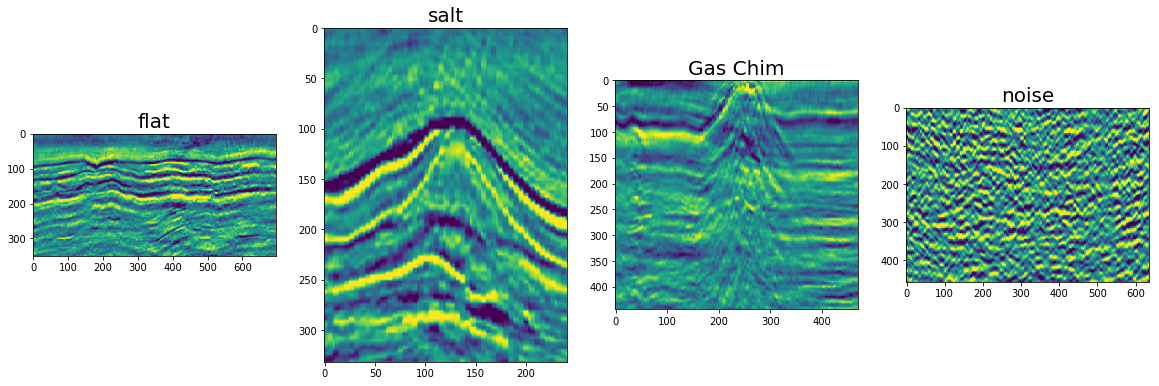

In [220]:
import matplotlib.pyplot as plt

figs, axs = plt.subplots(ncols=4, figsize=(20,7))

axs[0].imshow(flat_im[4][:,:,0])
axs[0].set_title('flat', fontsize=20)
axs[1].imshow(salt_im[4][:,:,0])
axs[1].set_title('salt', fontsize=20)
axs[2].imshow(gasc_im[4][:,:,0])
axs[2].set_title('Gas Chim', fontsize=20)
axs[3].imshow(nois_im[4][:,:,0])
axs[3].set_title('noise', fontsize=20)
plt.show()
#for im in flat_col_im:
#    print(np.min(np.array(im.tolist())), np.max(np.array(im.tolist())))
    

# Load data into DataFrames and add category label

In [193]:
ser = [np.array(im.tolist())[:,:,0] for im in flat_im]

df_flat = pd.DataFrame()
df_flat['ampbw'] = pd.Series(ser)
df_flat['categ'] = 'flat'
df_flat['imsizex'] = [s.shape[0] for s in ser]
df_flat['imsizey'] = [s.shape[1] for s in ser]

ser = [np.array(im.tolist())[:,:,0] for im in salt_im]

df_salt = pd.DataFrame()
df_salt['ampbw'] = pd.Series(ser)
df_salt['categ'] = 'salt'
df_salt['imsizex'] = [s.shape[0] for s in ser]
df_salt['imsizey'] = [s.shape[1] for s in ser]

ser = [np.array(im.tolist())[:,:,0] for im in gasc_im]

df_gasc = pd.DataFrame()
df_gasc['ampbw'] = pd.Series(ser)
df_gasc['categ'] = 'gasc'
df_gasc['imsizex'] = [s.shape[0] for s in ser]
df_gasc['imsizey'] = [s.shape[1] for s in ser]

ser = [np.array(im.tolist())[:,:,0] for im in nois_im]

df_nois = pd.DataFrame()
df_nois['ampbw'] = pd.Series(ser)
df_nois['categ'] = 'gasc'
df_nois['imsizex'] = [s.shape[0] for s in ser]
df_nois['imsizey'] = [s.shape[1] for s in ser]

df = pd.concat([df_flat, df_salt, df_gasc, df_nois])


In [195]:
df_nois.head()

,ampbw,categ,imsizex,imsizey
0,"[[167, 168, 168, 168, 146, 128, 120, 120, 120,...",gasc,347,446
1,"[[129, 127, 127, 130, 138, 141, 142, 142, 139,...",gasc,515,579
2,"[[161, 157, 159, 159, 159, 140, 153, 175, 175,...",gasc,457,636
3,"[[134, 169, 186, 186, 186, 174, 147, 106, 61, ...",gasc,457,636
4,"[[205, 207, 207, 207, 207, 212, 214, 216, 221,...",gasc,457,636


# Split Data into Training and Test

In this example we split the training by category to preserve an even split of categories between training and test

In [202]:
# split the data into train and test

from sklearn.model_selection import train_test_split

# Make X and y
X_flat_train, X_flat_, y_flat_train, y_flat_ = \
    train_test_split(df_flat[['ampbw','imsizex','imsizey']],
                     df_flat['categ'], test_size=0.2, random_state=42)

X_salt_train, X_salt_, y_salt_train, y_salt_ = \
    train_test_split(df_salt[['ampbw','imsizex','imsizey']],
                     df_salt['categ'], test_size=0.2, random_state=42)

X_gasc_train, X_gasc_, y_gasc_train, y_gasc_ = \
    train_test_split(df_gasc[['ampbw','imsizex','imsizey']],
                     df_gasc['categ'], test_size=0.2, random_state=42)

X_nois_train, X_nois_, y_nois_train, y_nois_ = \
    train_test_split(df_nois[['ampbw','imsizex','imsizey']],
                     df_nois['categ'], test_size=0.2, random_state=42)

In [206]:
df_X_train = pd.concat([X_flat_train, X_salt_train, X_gasc_train, X_nois_train])
df_X_ = pd.concat([X_flat_, X_salt_, X_gasc_, X_nois_])
df_y_train = pd.concat([y_flat_train, y_salt_train, y_gasc_train, y_nois_train])
df_y_ = pd.concat([y_flat_, y_salt_, y_gasc_, y_nois_])

df_X_train.to_pickle("data\\df_X_train.pickle")
df_X_.to_pickle("data\\df_X_test.pickle")
df_y_train.to_pickle("data\\df_y_train.pickle")
df_y_.to_pickle("data\\df_y_test.pickle")

# Create Patches Dataset

In [170]:
patch_size = 75
rand_stat = 42

In [174]:
from sklearn.feature_extraction import image

i=1
for im in df_flat['ampbw'].values:
    patches = image.extract_patches_2d(im, (patch_size, patch_size), max_patches=50, random_state=rand_stat)
    for patch in patches:
        #patch.s
        #print(patch.shape)
        patch = patch.repeat(3).reshape(100,100,3)
        imageio.imwrite(f'screenshots\\flatlayers\\bw_sub\\flat_{i:05d}.png', patch.astype('uint8'))
        i+=1

In [175]:
i=1
for im in df_salt['ampbw'].values:
    patches = image.extract_patches_2d(im, (patch_size,patch_size), max_patches=50, random_state=rand_stat)
    for patch in patches:
        #patch.s
        #print(patch.shape)
        patch = patch.repeat(3).reshape(patch_size,patch_size,3)
        imageio.imwrite(f'screenshots\\salt\\bw_sub\\salt_{i:05d}.png', patch.astype('uint8'))
        i+=1

In [176]:
i=1
for im in df_gasc['ampbw'].values:
    patches = image.extract_patches_2d(im, (patch_size,patch_size), max_patches=50, random_state=rand_stat)
    for patch in patches:
        #patch.s
        #print(patch.shape)
        patch = patch.repeat(3).reshape(patch_size,patch_size,3)
        imageio.imwrite(f'screenshots\\gas_chimney\\bw_sub\\gasc_{i:05d}.png', patch.astype('uint8'))
        i+=1

In [205]:
i=1
for im in df_nois['ampbw'].values:
    patches = image.extract_patches_2d(im, (patch_size,patch_size), max_patches=50, random_state=rand_stat)
    for patch in patches:
        #patch.s
        #print(patch.shape)
        patch = patch.repeat(3).reshape(patch_size,patch_size,3)
        imageio.imwrite(f'screenshots\\noise\\bw_sub\\nois{i:05d}.png', patch.astype('uint8'))
        i+=1

In [221]:
import random

TypeError: Image data cannot be converted to float

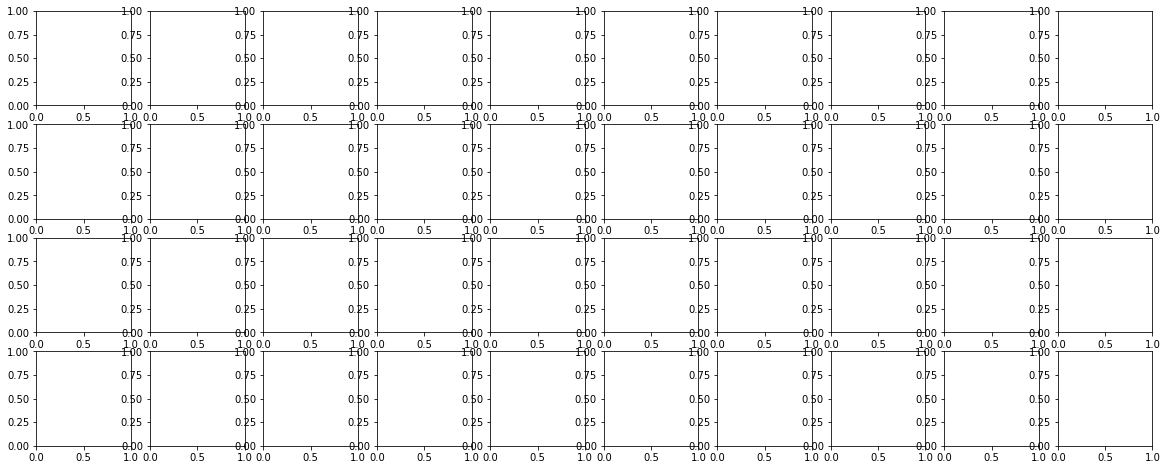

In [226]:
# different features
flat_files = glob.glob("screenshots\\flatlayers\\bw_sub\\*.png")
salt_files = glob.glob("screenshots\\salt\\bw_sub\\*.png")
gasc_files = glob.glob("screenshots\\gas_chimney\\bw_sub\\*.png")
nois_files = glob.glob("screenshots\\noise\\bw_sub\\*.png")

plotn = 10
flat_files = random.sample(flat_files ,plotn)
salt_files = random.sample(salt_files, plotn)
gasc_files = random.sample(gasc_files, plotn)
nois_files = random.sample(nois_files, plotn)


fig, axs = plt.subplots(nrows=4, ncols=plotn, figsize=(20,2*4))
for j in range(0,10):
    axs[0,j].imshow(flat_files[j][:,:,0])
    axs[1,j].imshow(salt_files[j][:,:,0])
    axs[2,j].imshow(gasc_files[j][:,:,0])
    axs[3,j].imshow(nois_files[j][:,:,0])


# images in
flat_im = [imageio.imread(im) for im in flat_files]
salt_im = [imageio.imread(im) for im in salt_files]
gasc_im = [imageio.imread(im) for im in gasc_files]
nois_im = [imageio.imread(im) for im in nois_files]